# Problem Statement - Comp-active Dataset ( Linear Regression )

## Context

The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.
Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

## Data Description :

System measures used:
lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation .

runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

usr - Portion of time (%) that cpus run in user mode




In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

In [4]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Mounted at /content/drive


## Import Dataset

In [48]:
learn = pd.read_excel('/content/drive/MyDrive/Python Course/compactiv.xlsx') ##  Complete the code to read the data

In [49]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

In [7]:
data.shape

(8192, 22)

### View the first and last 5 rows of the dataset

In [51]:
data.head(5) ##  Complete the code to view top 5 rows of the data

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.20000,0.20000,40671.00000,53995.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.60000,2.60000,16.00000,26.40000,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.20000,0.20000,448.00000,8385.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15.63000,16.83000,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.00000,2.40000,NaN,31950.00000,0.00000,0.00000,0.00000,0.00000,1.20000,6.00000,9.40000,150.20000,220.20000,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.20000,0.20000,NaN,8670.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20000,0.20000,15.60000,16.80000,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.40000,0.40000,NaN,12185.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.20000,37.80000,47.60000,Not_CPU_Bound,633,1760253,90


In [8]:
data.tail(5) ##  Complete the code to view last 5 rows of the data

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
8187,16,12,3009,360,244,1.60000,5.81000,405250.00000,85282.00000,8.02000,20.64000,43.69000,55.11000,0.60000,35.87000,47.90000,139.28000,270.74000,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.40000,1.80000,89489.00000,41764.00000,3.80000,4.80000,4.80000,0.20000,0.80000,3.80000,4.40000,122.40000,212.60000,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.60000,0.60000,325948.00000,52640.00000,0.40000,0.60000,0.60000,0.00000,0.40000,28.40000,45.20000,60.20000,219.80000,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.20000,1.20000,62571.00000,29505.00000,1.40000,1.60000,13.03000,18.04000,0.40000,23.05000,24.25000,93.19000,202.81000,CPU_Bound,141,1022458,83
8191,2,0,985,55,46,1.60000,4.80000,111111.00000,22256.00000,0.00000,0.00000,0.00000,0.00000,0.20000,3.40000,6.20000,91.80000,110.00000,CPU_Bound,659,1756514,94


### Understand the shape of the dataset

In [10]:
data.shape ## Complete the code to get the shape of data

(8192, 22)

### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.00000,19.55969,53.35380,0.00000,2.00000,7.00000,20.00000,1845.00000
lwrite,8192.00000,13.10620,29.89173,0.00000,0.00000,1.00000,10.00000,575.00000
scall,8192.00000,2306.31824,1633.61732,109.00000,1012.00000,2051.50000,3317.25000,12493.00000
sread,8192.00000,210.47998,198.98015,6.00000,86.00000,166.00000,279.00000,5318.00000
swrite,8192.00000,150.05823,160.47898,7.00000,63.00000,117.00000,185.00000,5456.00000
fork,8192.00000,1.88455,2.47949,0.00000,0.40000,0.80000,2.20000,20.12000
exec,8192.00000,2.79200,5.21246,0.00000,0.20000,1.20000,2.80000,59.56000
rchar,8088.00000,197385.72836,239837.49353,278.00000,34091.50000,125473.50000,267828.75000,2526649.00000
wchar,8177.00000,95902.99278,140841.70791,1498.00000,22916.00000,46619.00000,106101.00000,1801623.00000
pgout,8192.00000,2.28532,5.30704,0.00000,0.00000,0.00000,2.40000,81.44000


In [15]:
# checking for duplicate values
data.duplicated().sum()

0

In [16]:
# checking for non-unique values
data.nunique()

lread        235
lwrite       189
scall       4115
sread        794
swrite       640
fork         228
exec         386
rchar       7898
wchar       7925
pgout        404
ppgout       774
pgfree      1070
pgscan      1202
atch         253
pgin         832
ppgin       1072
pflt        2987
vflt        3799
runqsz         2
freemem     3165
freeswap    7658
usr           56
dtype: int64

In [52]:
# checking for missing values
data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

There is no duplicated column, data set doesn’t have duplicate rows as well
Data set doesn’t have null values as well except rchar and wchar columns.
Let us use the ‘For loop ’ to treat these null values by replace with median values

## Impute the Missing Values

In [53]:
for column in data[['rchar','wchar']]:
    median = data[column].median()
    data[column] = data[column].fillna(median)

In [54]:
# check once again missing values
data.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [55]:
# Check for variables with zeros and handle accordingly
# For example, if 'pgout' has zeros and they are not meaningful, you can replace them with NaN or drop the rows:
data['pgout'].replace(0, np.nan, inplace=True)
data.dropna(subset=['pgout'], inplace=True)

In [28]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64
--------------------------------------------------


In [29]:
data['runqsz'].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

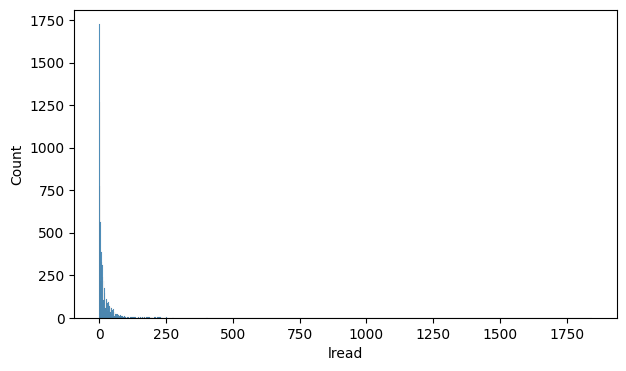

In [55]:
# Univariate Analysis

# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['lread'])
plt.show()

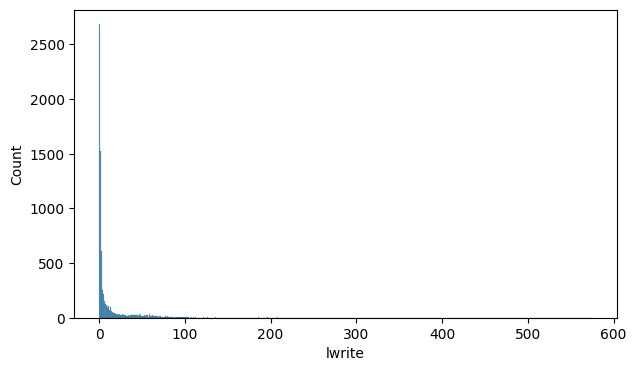

In [56]:

# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['lwrite'])
plt.show()

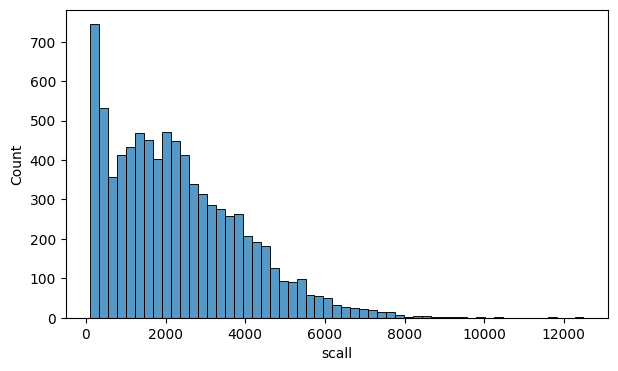

In [58]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['scall'])
plt.show()

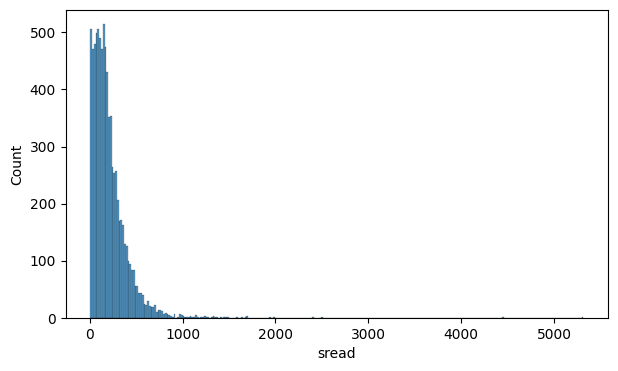

In [59]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['sread'])
plt.show()

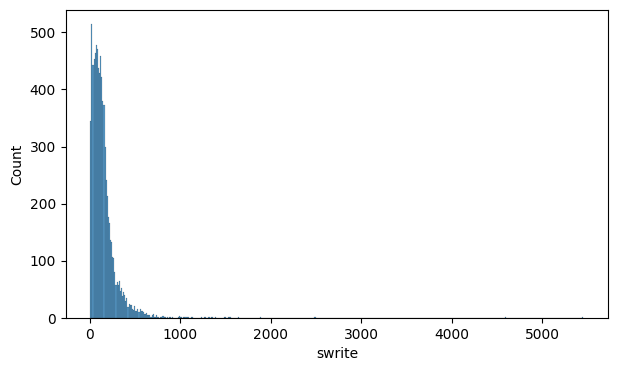

In [60]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['swrite'])
plt.show()

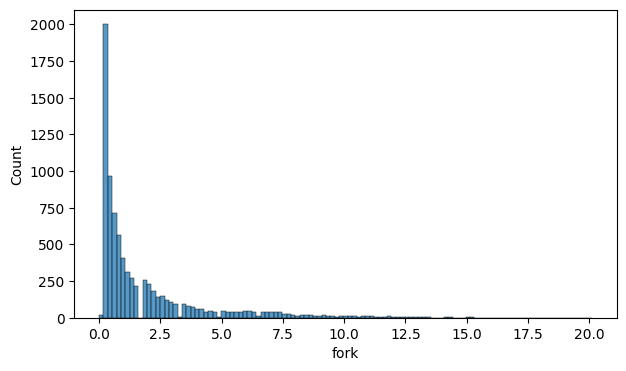

In [61]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['fork'])
plt.show()

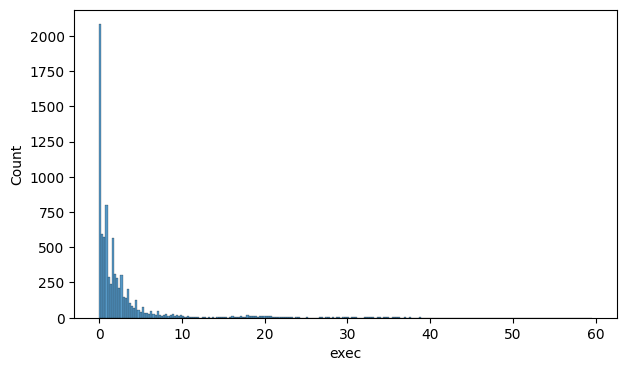

In [62]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['exec'])
plt.show()

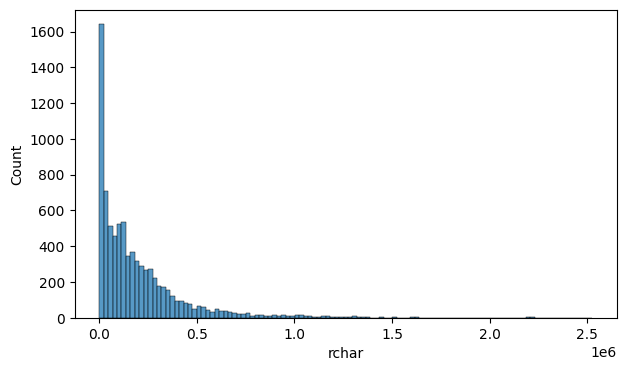

In [64]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['rchar'])
plt.show()

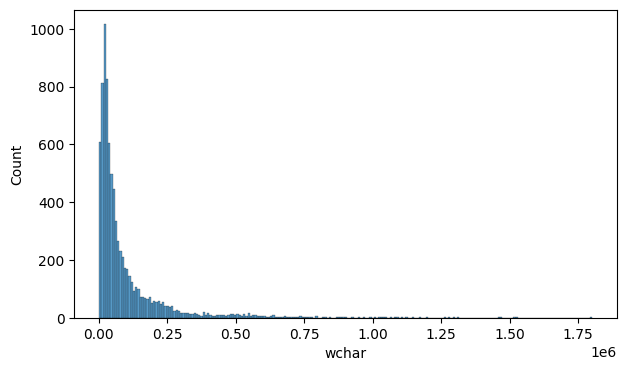

In [65]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['wchar'])
plt.show()

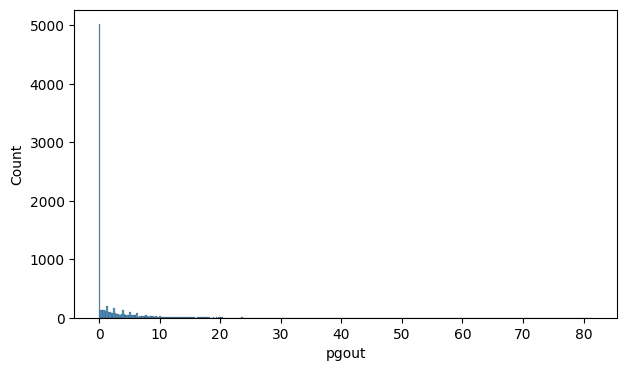

In [66]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['pgout'])
plt.show()

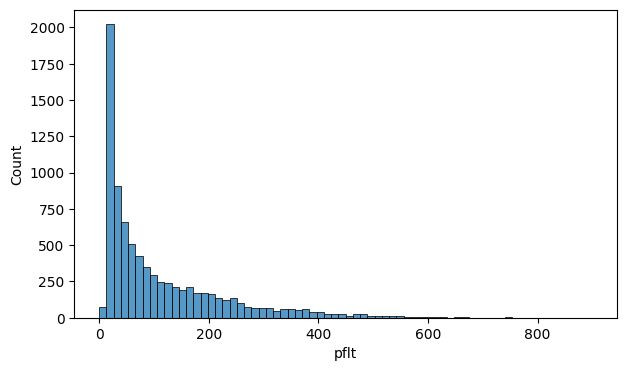

In [67]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['pflt'])
plt.show()

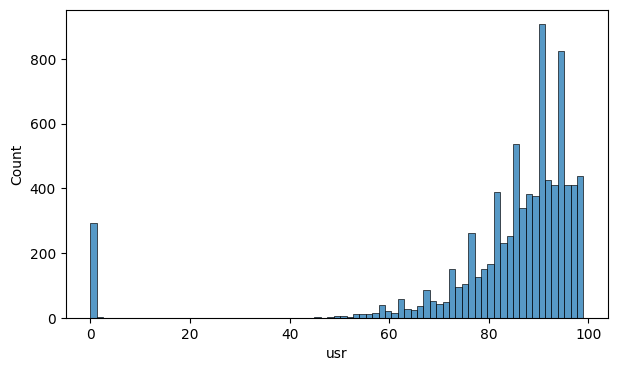

In [63]:
# Visualize the distribution of each variable
plt.figure(figsize=(7, 4))
sns.histplot(data['usr'])
plt.show()

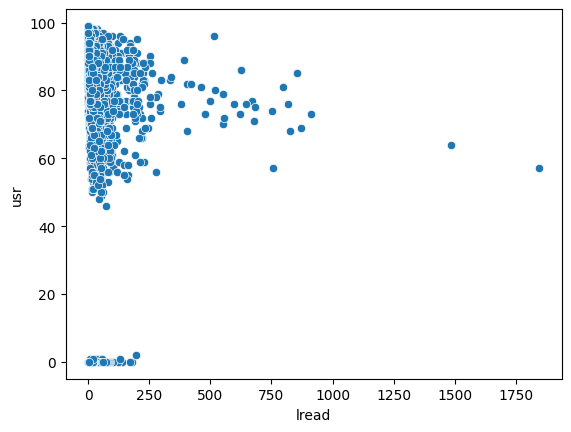

In [68]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='lread', y='usr')
plt.show()

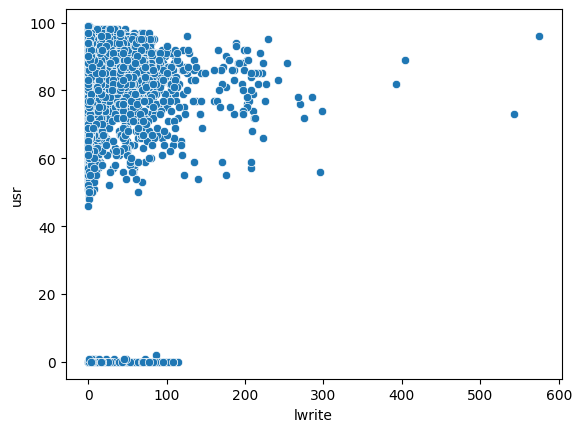

In [69]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='lwrite', y='usr')
plt.show()

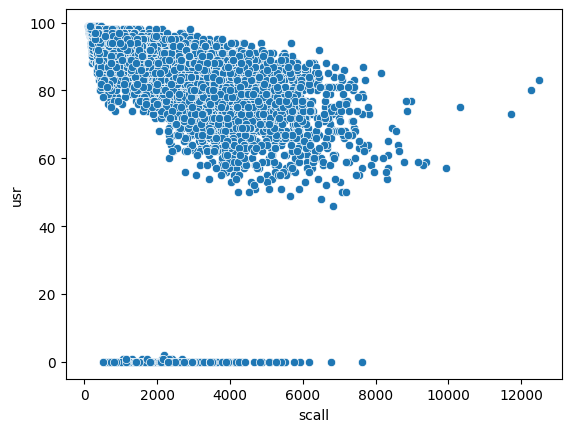

In [70]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='scall', y='usr')
plt.show()

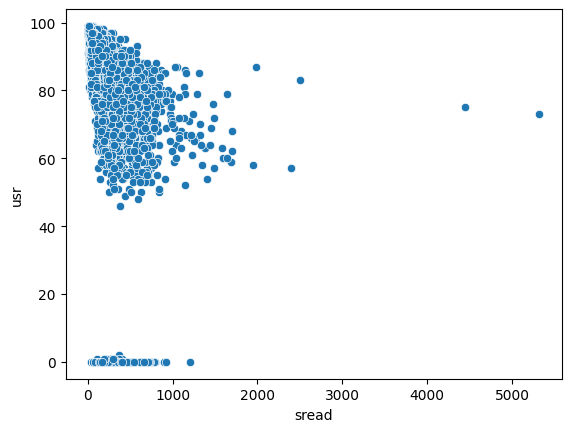

In [71]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='sread', y='usr')
plt.show()

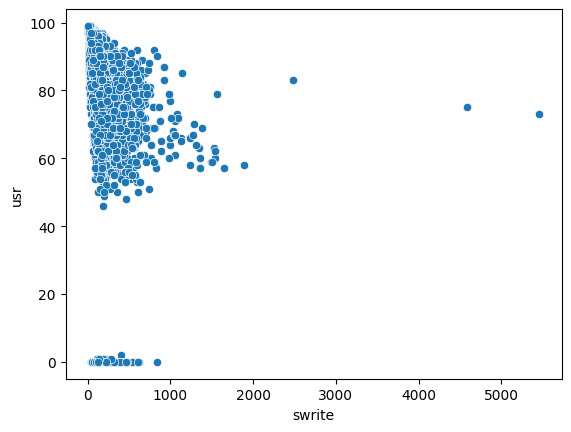

In [72]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='swrite', y='usr')
plt.show()

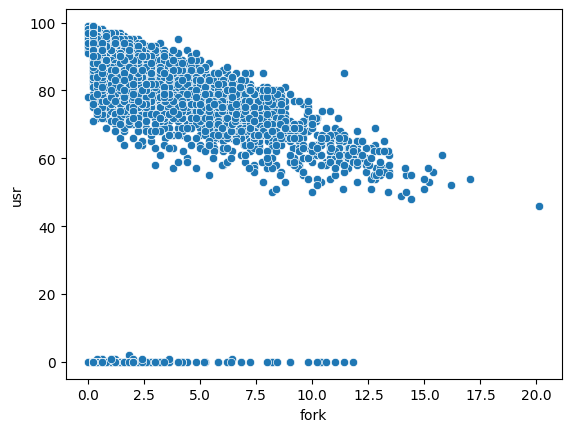

In [73]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='fork', y='usr')
plt.show()

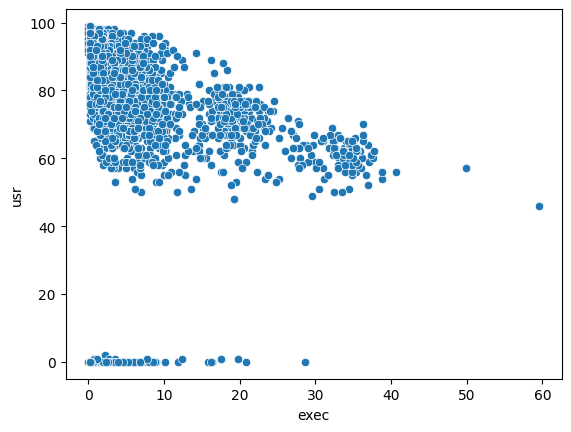

In [74]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='exec', y='usr')
plt.show()

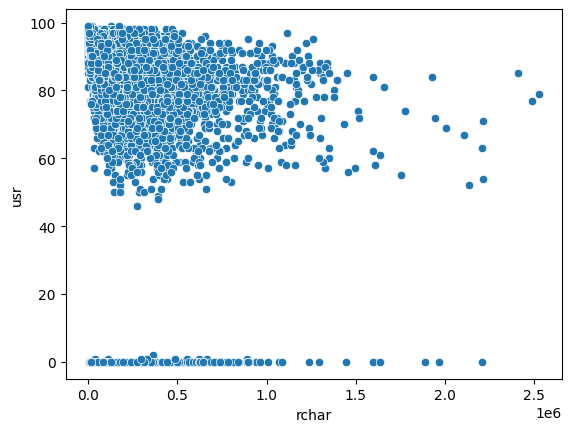

In [75]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='rchar', y='usr')
plt.show()

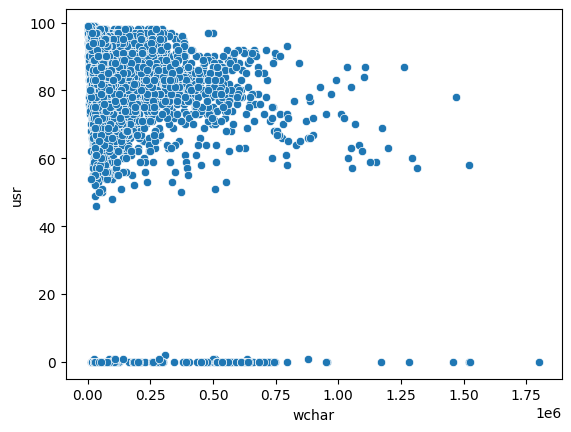

In [76]:
# Perform bivariate analysis
sns.scatterplot(data=data, x='wchar', y='usr')
plt.show()

In [77]:
# Perform multivariate analysis
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Step 2: Handling Missing Values, Zeros, Outliers, and Duplicates

In [83]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [132]:
# Handle missing values (e.g., impute or drop)
# For example, if 'lread' has missing values and you want to impute them with the mean:
mean_lread = data['lread'].mean()
data['lread'].fillna(mean_lread, inplace=True)

In [84]:
# Check for variables with zeros and handle accordingly
# For example, if 'pgout' has zeros and they are not meaningful, you can replace them with NaN or drop the rows:
data['pgout'].replace(0, np.nan, inplace=True)
data.dropna(subset=['pgout'], inplace=True)

In [138]:
# Check for outliers using box plots or other techniques
# For example, to detect outliers in 'usr' column using the IQR method:
Q1 = data['usr'].quantile(0.25)
Q3 = data['usr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['usr'] < lower_bound) | (data['usr'] > upper_bound)]
print(outliers)

      lread  lwrite  scall  sread  swrite     fork     exec         rchar  \
7        21      18   2799    291     211  0.60000  0.40000  167537.00000   
32        6       1   2414    249     163  1.20000  3.60000  167537.00000   
51       50      65   2292    357     201  0.40000  1.80000  167537.00000   
63        7       2   2404    211     153  1.40000  2.61000  167537.00000   
144      13       0   8309   1407     519 10.80000 14.20000 2214883.00000   
...     ...     ...    ...    ...     ...      ...      ...           ...   
8002      8       6   1152    138      96  0.40000  0.40000   16017.00000   
8017      3       1   1833    659     317  0.20000  0.20000  735962.00000   
8084     73      83   4405    540     461  8.42000  2.40000  272948.00000   
8086     60      78    862    387     131  0.20000  0.20000  626392.00000   
8166     18       1   1135    188     135  2.40000 12.40000  485245.00000   

            wchar   pgout   ppgout   pgfree   pgscan    atch     pgin  \
7 

In [139]:
# Check for duplicates and remove if necessary
data.drop_duplicates(inplace=True)

###Step 1.3: Feature Engineering and Encoding

### 1.3.1 Encode Categorical Variables

In [56]:
# Perform feature engineering if required

# Encode categorical variables using one-hot encoding or label encoding
# For example, if 'attribute' is a categorical variable:
encoded_data = pd.get_dummies(data, columns=['runqsz'], drop_first=True)

###Step 1.3.2: Train-Test Split

In [141]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = encoded_data.drop('usr', axis=1)
y = encoded_data['usr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
print(y_train)

1123    84
6153    73
2272     0
3369    97
5075    81
        ..
2708    65
2795    76
3201    89
2095    71
7864    88
Name: usr, Length: 2319, dtype: int64


### Step 1.3.3 : Linear Regression Modeling

In [144]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


model = LinearRegression()
#print(X_train)
#print(y_train)
model.fit(X_train, y_train)

#regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)

# Fit the linear regression model on the training data
#reg_model = LinearRegression()
#reg_model.fit(X_train, y_train)

# Check for significant variables using statsmodels
X_train_sm = sm.add_constant(X_train)  # Add constant term for statsmodels
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              3820.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                        0.00
Time:                        13:54:30   Log-Likelihood:                         -9343.6
No. Observations:                2319   AIC:                                  1.873e+04
Df Residuals:                    2298   BIC:                                  1.885e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

###Step 6: Model Evaluation

In [145]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate R-squared and RMSE on training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE on test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training Set:")
print("R-squared:", r2_train)
print("RMSE:", rmse_train)

print("\nTest Set:")
print("R-squared:", r2_test)
print("RMSE:", rmse_test)

Training Set:
R-squared: 0.7022833821208176
RMSE: 11.644767419087993

Test Set:
R-squared: 0.6686290812875155
RMSE: 11.726287748925351


### Step 7: Inference and Business Insights

In [57]:
# Analyze the coefficients of significant variables
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_})
significant_variables = coefficients[coefficients['Coefficient'] != 0]

# Business insights and recommendations based on coefficients and predictions
# Interpret the impact of significant variables on 'usr' and provide actionable insights based on the analysis.

## Problem 2

### Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Dataset for Problem 2: Contraceptive_method_dataset.xlsx

Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Python Course/Contraceptive_method_dataset.xlsx') ##  Complete the code to read the data

In [8]:
df.shape

(1473, 10)

In [9]:
df.head(5)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.00000,Primary,Secondary,3.00000,Scientology,No,2,High,Exposed,No
1,45.00000,Uneducated,Secondary,10.00000,Scientology,No,3,Very High,Exposed,No
2,43.00000,Primary,Secondary,7.00000,Scientology,No,3,Very High,Exposed,No
3,42.00000,Secondary,Primary,9.00000,Scientology,No,3,High,Exposed,No
4,36.00000,Secondary,Secondary,8.00000,Scientology,No,3,Low,Exposed,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [11]:
# Check the data types

print(df.dtypes)

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object


In [12]:
# Check for null values
print(df.isnull().sum())

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [14]:
# Impute missing values

df["Wife_age"].fillna(1, inplace=True)

In [15]:
# Impute missing values

df["No_of_children_born"].fillna(1, inplace=True)

In [16]:
print(df.isnull().sum())

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64


In [17]:
# Check for zero values

print(df[df["No_of_children_born"] == 0])

      Wife_age Wife_ education Husband_education  No_of_children_born  \
5     19.00000        Tertiary          Tertiary              0.00000   
15    26.00000         Primary          Tertiary              0.00000   
21    24.00000       Secondary          Tertiary              0.00000   
27    29.00000        Tertiary          Tertiary              0.00000   
28    24.00000        Tertiary          Tertiary              0.00000   
32    26.00000         Primary          Tertiary              0.00000   
41    47.00000         Primary         Secondary              0.00000   
47    45.00000        Tertiary          Tertiary              0.00000   
49    26.00000        Tertiary          Tertiary              0.00000   
50    31.00000        Tertiary          Tertiary              0.00000   
58    21.00000         Primary         Secondary              0.00000   
74    21.00000       Secondary          Tertiary              0.00000   
76    29.00000        Tertiary          Tertiary   

In [18]:
# Create new features

df["Education_level"] = df["Wife_ education"] + df["Husband_education"]

<Axes: >

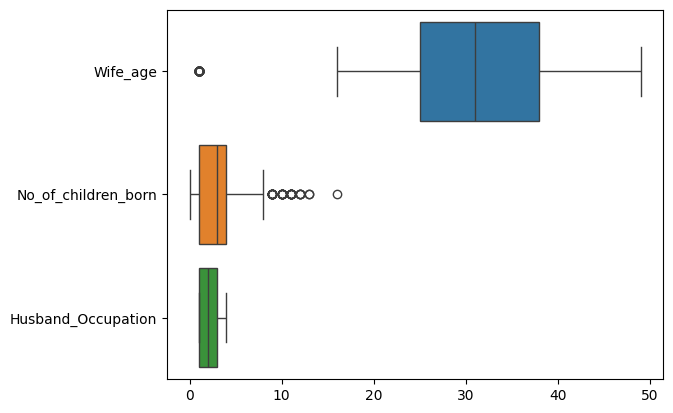

In [19]:
# Check for outliers
sns.boxplot(data=df, orient='h')

In [20]:
# Check for outliers

print(df.describe())

        Wife_age  No_of_children_born  Husband_Occupation
count 1473.00000           1473.00000          1473.00000
mean    31.08282              3.22200             2.13781
std     10.53720              2.36345             0.86486
min      1.00000              0.00000             1.00000
25%     25.00000              1.00000             1.00000
50%     31.00000              3.00000             2.00000
75%     38.00000              4.00000             3.00000
max     49.00000             16.00000             4.00000


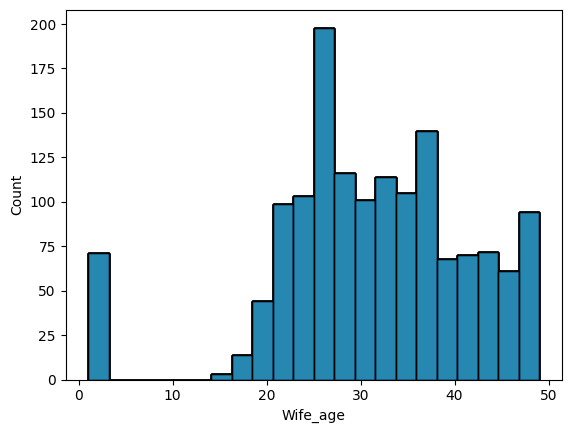

In [21]:
# Perform univariate analysis

for column in df.columns:
#  print(data[column].describe())
 sns.histplot(df['Wife_age'])
plt.show()

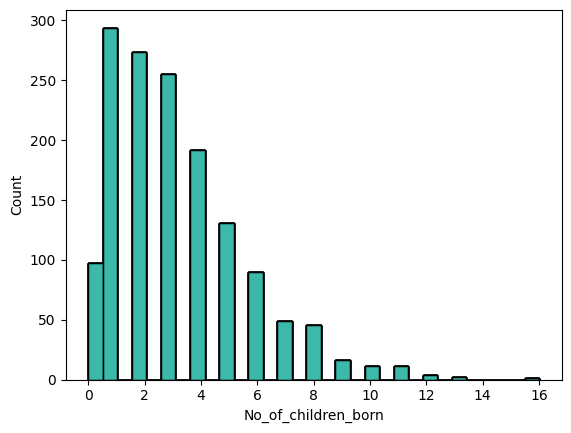

In [227]:
# Perform univariate analysis

for column in df.columns:
#  print(data[column].describe())
 sns.histplot(df['No_of_children_born'])
plt.show()

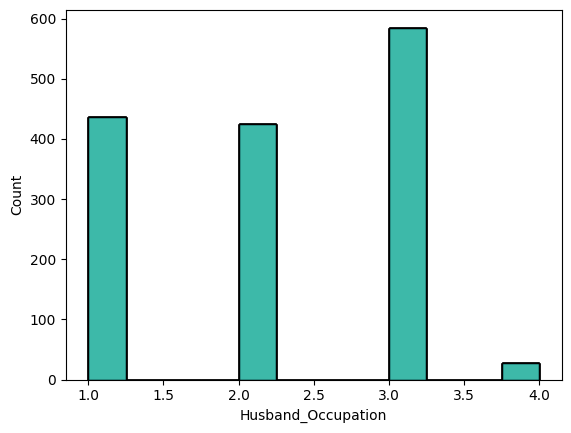

In [228]:
for column in df.columns:
#  print(data[column].describe())
 sns.histplot(df['Husband_Occupation'])
plt.show()

In [232]:
df.

<bound method DataFrame.info of       Wife_age Wife_ education Husband_education  No_of_children_born  \
0     24.00000         Primary         Secondary              3.00000   
1     45.00000      Uneducated         Secondary             10.00000   
2     43.00000         Primary         Secondary              7.00000   
3     42.00000       Secondary           Primary              9.00000   
4     36.00000       Secondary         Secondary              8.00000   
...        ...             ...               ...                  ...   
1468  33.00000        Tertiary          Tertiary              1.00000   
1469  33.00000        Tertiary          Tertiary              1.00000   
1470  39.00000       Secondary         Secondary              1.00000   
1471  33.00000       Secondary         Secondary              1.00000   
1472  17.00000       Secondary         Secondary              1.00000   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scie

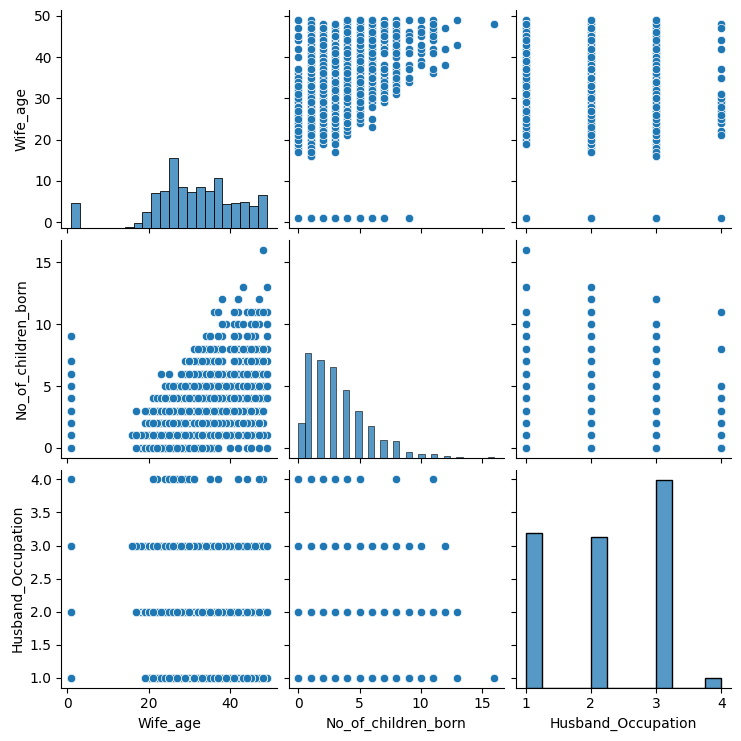

In [231]:
# Perform multivariate analysis
sns.pairplot(df)
plt.show()

##Step 2: Data Preprocessing

1. Encode the Data

In [22]:
# Encode the data

data_new = pd.get_dummies(df)

In [23]:
data_new.info

<bound method DataFrame.info of       Wife_age  No_of_children_born  Husband_Occupation  \
0     24.00000              3.00000                   2   
1     45.00000             10.00000                   3   
2     43.00000              7.00000                   3   
3     42.00000              9.00000                   3   
4     36.00000              8.00000                   3   
...        ...                  ...                 ...   
1468  33.00000              1.00000                   2   
1469  33.00000              1.00000                   1   
1470  39.00000              1.00000                   1   
1471  33.00000              1.00000                   2   
1472  17.00000              1.00000                   2   

      Wife_ education_Primary  Wife_ education_Secondary  \
0                           1                          0   
1                           0                          0   
2                           1                          0   
3                  

Split the Data into Train and Test Data Sets

In [24]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(data_new, data_new["Contraceptive_method_used_Yes"], test_size=0.3)

In [25]:
data_new = pd.get_dummies(df)

##Fit The Model
###Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [29]:
# Fit the model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Check for significant variables
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS


results = OLS(y_train, X_train).fit()

print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Contraceptive_method_used_Yes   R-squared:                       1.000
Model:                                       OLS   Adj. R-squared:                  1.000
Method:                            Least Squares   F-statistic:                 1.381e+30
Date:                           Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                   07:24:51   Log-Likelihood:                 33113.
No. Observations:                           1031   AIC:                        -6.618e+04
Df Residuals:                               1006   BIC:                        -6.605e+04
Df Model:                                     24                                         
Covariance Type:                       nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.

In [194]:
test_r_squared = model.score(X_test, y_test)

test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

test_adjusted_r_squared = 1 - (1 - test_r_squared) * (len(y_test) - 1) / (len(y_test) - len(model.coef_) - 1)

In [195]:
print("Train R-squared:", train_r_squared)

print("Train RMSE:", train_rmse)

print("Train adjusted R-squared:", train_adjusted_r_squared)

print("Test R-squared:", test_r_squared)

print("Test RMSE:", test_rmse)

print("Test adjusted R-squared:", test_adjusted_r_squared)

Train R-squared: 1.0
Train RMSE: 3.687853705643716e-15
Train adjusted R-squared: 1.0
Test R-squared: 1.0
Test RMSE: 3.628937141373073e-15
Test adjusted R-squared: 1.0


In [32]:
# Fit the models to the train sets

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [34]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
cart = DecisionTreeClassifier()

cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Predict the labels for the test sets

logistic_regression_predictions = logistic_regression.predict(X_test)

lda_predictions = lda.predict(X_test)

cart_predictions = cart.predict(X_test)

In [38]:
# Calculate the accuracy, confusion matrix, ROC curve, and ROC_AUC score for each model

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)

#logistic_regression_roc_curve,
logistic_regression_roc_auc_score = roc_curve(y_test, logistic_regression_predictions)

In [40]:
lda_accuracy = accuracy_score(y_test, lda_predictions)

lda_confusion_matrix = confusion_matrix(y_test, lda_predictions)

#lda_roc_curve, lda_roc_auc_score = roc_curve(y_test, lda_predictions)
lda_roc_auc_score = roc_curve(y_test, lda_predictions)

In [41]:
cart_accuracy = accuracy_score(y_test, cart_predictions)

cart_confusion_matrix = confusion_matrix(y_test, cart_predictions)

#cart_roc_curve, cart_roc_auc_score = roc_curve(y_test, cart_predictions)
cart_roc_auc_score = roc_curve(y_test, cart_predictions)

In [42]:
# Compare the models based on the performance metrics

print("Logistic regression accuracy:", logistic_regression_accuracy)

print("LDA accuracy:", lda_accuracy)

print("CART accuracy:", cart_accuracy)

Logistic regression accuracy: 1.0
LDA accuracy: 0.6719457013574661
CART accuracy: 1.0


In [43]:
print("Logistic regression confusion matrix:")

print(logistic_regression_confusion_matrix)

Logistic regression confusion matrix:
[[189   0]
 [  0 253]]


In [44]:
print("LDA confusion matrix:")

print(lda_confusion_matrix)

LDA confusion matrix:
[[ 87 102]
 [ 43 210]]


In [45]:
print("CART confusion matrix:")

print(cart_confusion_matrix)

CART confusion matrix:
[[189   0]
 [  0 253]]


In [46]:
print("Logistic regression ROC_AUC score:", logistic_regression_roc_auc_score)

print("LDA ROC_AUC score:", lda_roc_auc_score)

print("CART ROC_AUC score:", cart_roc_auc_score)

Logistic regression ROC_AUC score: (array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))
LDA ROC_AUC score: (array([0.        , 0.53968254, 1.        ]), array([0.        , 0.83003953, 1.        ]), array([2, 1, 0]))
CART ROC_AUC score: (array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))
